In [19]:
# Imports
import fastf1
import matplotlib as mpl
import matplotlib.pyplot as plt
from fastf1 import plotting
from timple.timedelta import strftimedelta
from fastf1.core import Laps
import pandas as pd
import seaborn as sns

In [20]:
# GP picker
year = 2022 #GP year
gp = 'Bahrain' # GP name
event = 1 # Q for qualifying, FP1 for free practice 1, R for race

In [21]:
# Configure matplotlib and f1 plots with this intit
mpl.rcParams['figure.dpi'] = 110
mpl.rcParams['figure.figsize'] = (6,6)
fastf1.Cache.enable_cache(r"/Users/Professor/Downloads/f1/cache")
fastf1.plotting.setup_mpl()
fastf1.plotting.setup_mpl(mpl_timedelta_support = True, color_scheme = 'fastf1', misc_mpl_mods = False)

In [22]:
session = fastf1.get_session(year, gp, event)
laps = session.load_laps(with_telemetry=True)
laps.dropna(subset=['Driver'], inplace = True)

/usr/local/lib/python3.9/site-packages/fastf1/core.py:1096: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Bahrain Grand Prix - Practice 1 [v2.2.0]
api            INFO 	Using cached data for driver_info
core          ERROR 	Failed to load data from Ergast API!
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/site-packages/fastf1/core.py", line 1407, in _drivers_results_from_ergast
    data = ergast.fetch_results(
  File "/usr/local/lib/python3.9/site-packages/fastf1/ergast.py", line 25, in fetch_results
    return _parse_ergast(fetch_day(year, gp, day))[0][sel]
IndexError: list index out of range
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for s

In [63]:
driver = 'VER'
all_ver = laps.pick_driver(driver).pick_accurate()
all_ver_tel = all_ver.get_telemetry()
lap_ver = laps[laps['Driver']==driver].pick_fastest()
tel_ver = lap_ver.get_telemetry()
car_ver = lap_ver.get_car_data()
driver = 'HAM'
all_ham = laps.pick_driver(driver).pick_accurate()
all_ham_tel = all_ham.get_telemetry()
lap_ham = laps[laps['Driver']==driver].pick_fastest()
tel_ham = lap_ham.get_telemetry()
car_ham = lap_ham.get_car_data()

ValueError: Telemetry does not contain required channels 'Time' and 'Speed'.

/usr/local/lib/python3.9/site-packages/fastf1/events.py:634: FutureWarning: The `Weekend.name` property is deprecated and will beremoved in a future version.
Use `Event['EventName']` or `Event.EventName` instead.
  warnings.warn(


Text(0.5, 1.0, 'Bahrain Grand Prix 2022 \nFP1, Gear #')

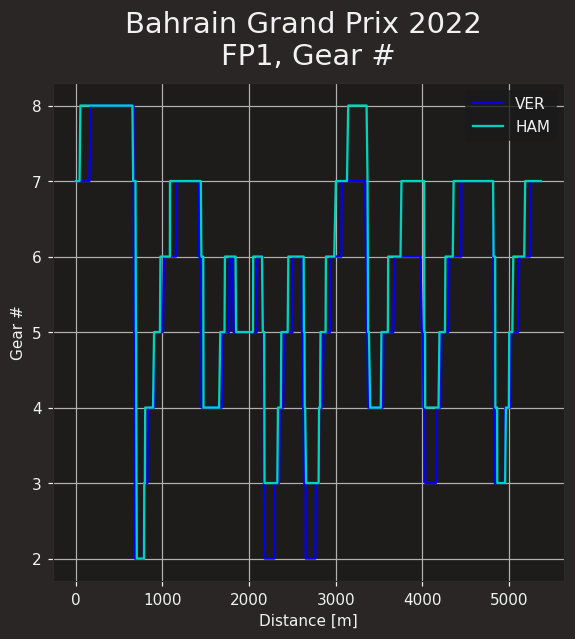

In [24]:
plt.plot(tel_ver['Distance'], tel_ver['nGear'], label='VER', color=fastf1.plotting.team_color('Red Bull'))
plt.plot(tel_ham['Distance'], tel_ham['nGear'], label='HAM', color=fastf1.plotting.team_color('Mercedes'))
plt.xlabel('Distance [m]')
plt.ylabel('Gear #')
plt.grid()
plt.legend()
plt.title(f"{session.event.name} {session.event.year} \nFP1, Gear #")

/usr/local/lib/python3.9/site-packages/fastf1/events.py:634: FutureWarning: The `Weekend.name` property is deprecated and will beremoved in a future version.
Use `Event['EventName']` or `Event.EventName` instead.
  warnings.warn(


Text(0.5, 1.0, 'Bahrain Grand Prix 2022 \nQualifying, RPM')

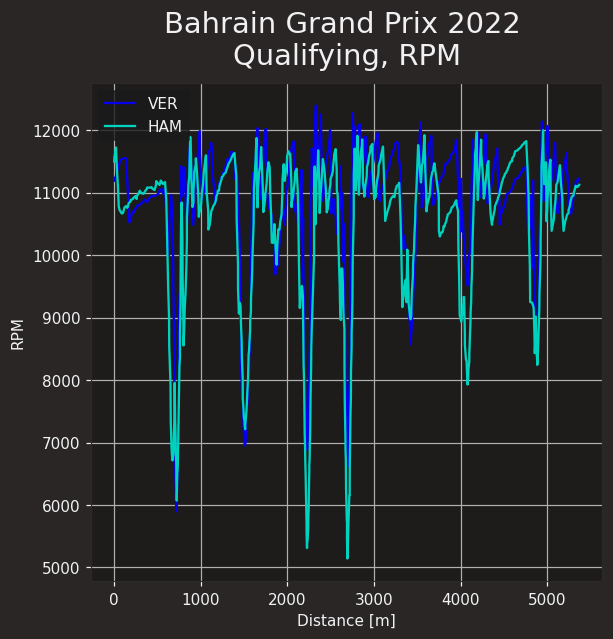

In [25]:
plt.plot(tel_ver['Distance'], tel_ver['RPM'], label='VER', color=fastf1.plotting.team_color('Red Bull'))
plt.plot(tel_ham['Distance'], tel_ham['RPM'], label='HAM', color=fastf1.plotting.team_color('Mercedes'))
plt.xlabel('Distance [m]')
plt.ylabel('RPM')
#plt.ylim(0, 9)
plt.grid()
plt.legend()
plt.title(f"{session.event.name} {session.event.year} \nQualifying, RPM")

/usr/local/lib/python3.9/site-packages/fastf1/events.py:634: FutureWarning: The `Weekend.name` property is deprecated and will beremoved in a future version.
Use `Event['EventName']` or `Event.EventName` instead.
  warnings.warn(


Text(0.5, 1.0, 'Bahrain Grand Prix 2022 \nQualifying, Throttle')

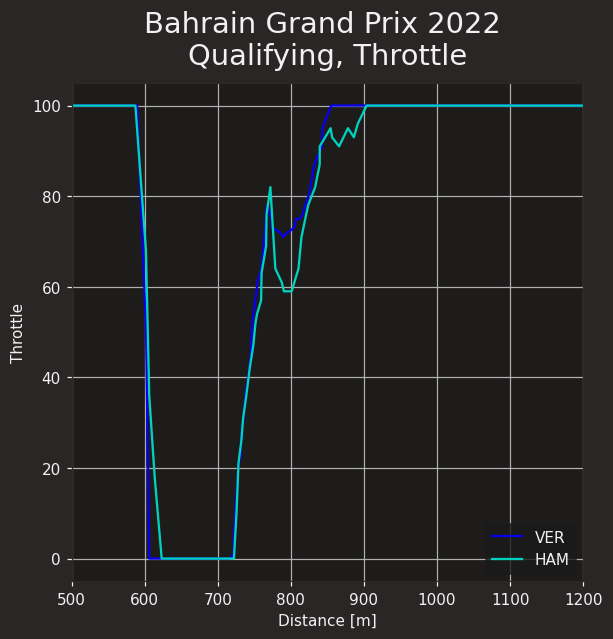

In [26]:
plt.plot(tel_ver['Distance'], tel_ver['Throttle'], label='VER', color=fastf1.plotting.team_color('Red Bull'))
plt.plot(tel_ham['Distance'], tel_ham['Throttle'], label='HAM', color=fastf1.plotting.team_color('Mercedes'))
plt.xlabel('Distance [m]')
plt.ylabel('Throttle')
plt.xlim(500, 1200)
plt.grid()
plt.legend()
plt.title(f"{session.event.name} {session.event.year} \nQualifying, Throttle")

/usr/local/lib/python3.9/site-packages/fastf1/events.py:634: FutureWarning: The `Weekend.name` property is deprecated and will beremoved in a future version.
Use `Event['EventName']` or `Event.EventName` instead.
  warnings.warn(


Text(0.5, 1.0, 'Bahrain Grand Prix 2022 \nQualifying, Brake')

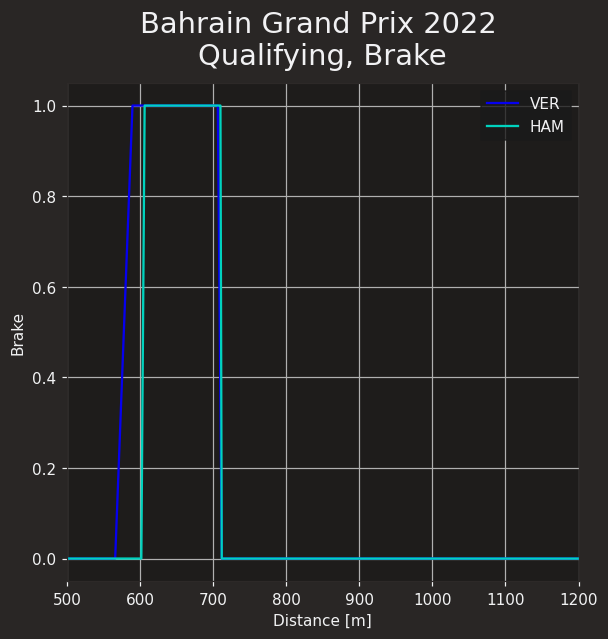

In [37]:
plt.plot(tel_ver['Distance'], tel_ver['Brake'], label='VER', color=fastf1.plotting.team_color('Red Bull'))
plt.plot(tel_ham['Distance'], tel_ham['Brake'], label='HAM', color=fastf1.plotting.team_color('Mercedes'))
plt.xlabel('Distance [m]')
plt.ylabel('Brake')
plt.xlim(500, 1200)
plt.grid()
plt.legend()
plt.title(f"{session.event.name} {session.event.year} \nQualifying, Brake")

/usr/local/lib/python3.9/site-packages/fastf1/events.py:634: FutureWarning: The `Weekend.name` property is deprecated and will beremoved in a future version.
Use `Event['EventName']` or `Event.EventName` instead.
  warnings.warn(


Text(0.5, 1.0, 'Bahrain Grand Prix 2022 \nQualifying, DRS')

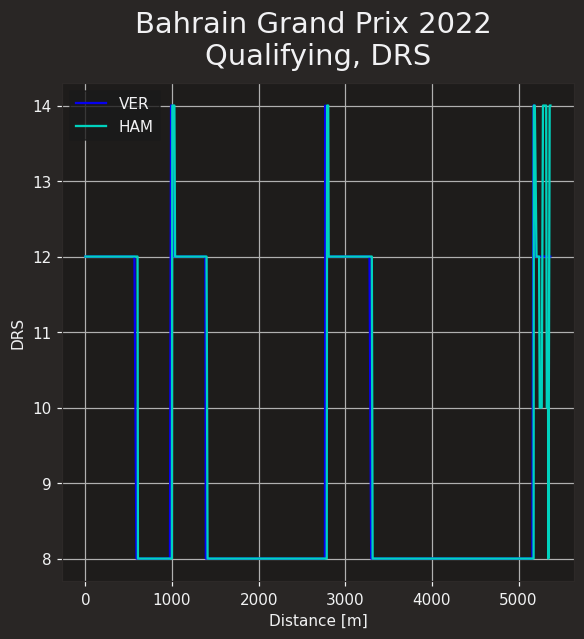

In [38]:
plt.plot(tel_ver['Distance'], tel_ver['DRS'], label='VER', color=fastf1.plotting.team_color('Red Bull'))
plt.plot(tel_ham['Distance'], tel_ham['DRS'], label='HAM', color=fastf1.plotting.team_color('Mercedes'))
plt.xlabel('Distance [m]')
plt.ylabel('DRS')
#plt.xlim(500, 1200)
plt.grid()
plt.legend()
plt.title(f"{session.event.name} {session.event.year} \nQualifying, DRS")

/usr/local/lib/python3.9/site-packages/fastf1/events.py:634: FutureWarning: The `Weekend.name` property is deprecated and will beremoved in a future version.
Use `Event['EventName']` or `Event.EventName` instead.
  warnings.warn(


Text(0.5, 1.0, 'Bahrain Grand Prix 2022 \nQualifying, Acceleration')

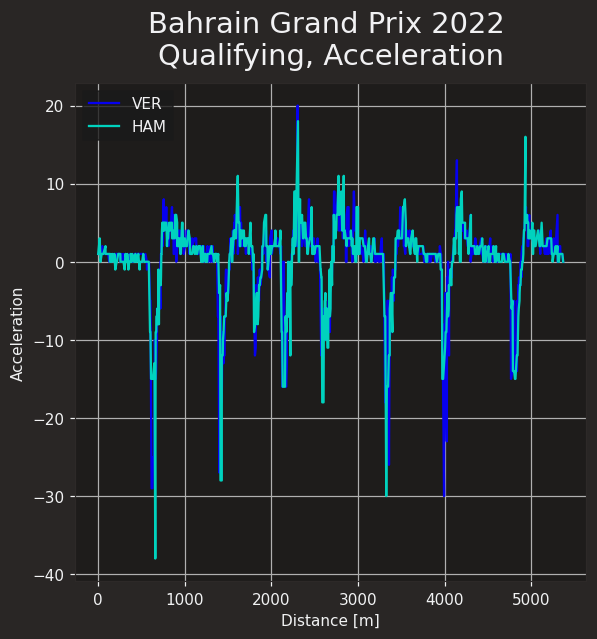

In [64]:
plt.plot(tel_ver['Distance'], tel_ver['Speed'].diff(), label='VER', color=fastf1.plotting.team_color('Red Bull'))
plt.plot(tel_ham['Distance'], tel_ham['Speed'].diff(), label='HAM', color=fastf1.plotting.team_color('Mercedes'))
plt.xlabel('Distance [m]')
plt.ylabel('Acceleration')
#plt.xlim(500, 1200)
plt.grid()
plt.legend()
plt.title(f"{session.event.name} {session.event.year} \nQualifying, Acceleration")

/usr/local/lib/python3.9/site-packages/fastf1/events.py:634: FutureWarning: The `Weekend.name` property is deprecated and will beremoved in a future version.
Use `Event['EventName']` or `Event.EventName` instead.
  warnings.warn(


Text(0.5, 1.0, 'Bahrain Grand Prix 2022 \nQualifying, Speed')

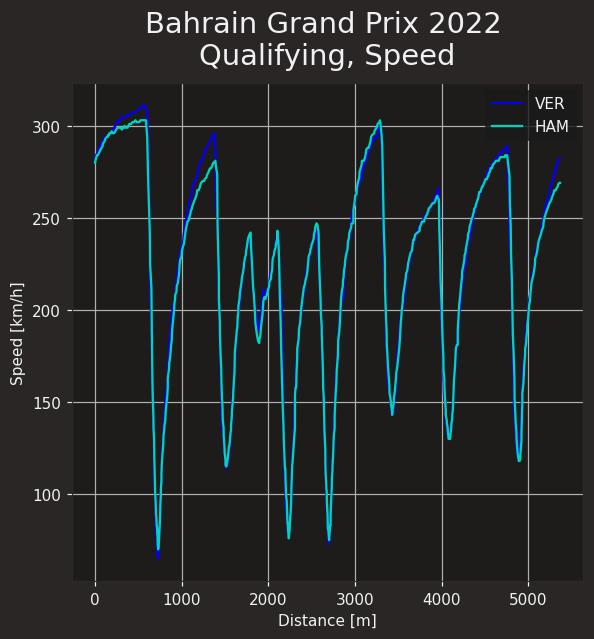

In [72]:
plt.plot(tel_ver['Distance'], tel_ver['Speed'], label='VER', color=fastf1.plotting.team_color('Red Bull'))
plt.plot(tel_ham['Distance'], tel_ham['Speed'], label='HAM', color=fastf1.plotting.team_color('Mercedes'))
plt.xlabel('Distance [m]')
plt.ylabel('Speed [km/h]')
#plt.xlim(4700, 5100)
plt.grid()
plt.legend()
plt.title(f"{session.event.name} {session.event.year} \nQualifying, Speed")

In [58]:
plt.plot(all_ham['Distance'], all_ham['Speed'], label='VER', color=fastf1.plotting.team_color('Red Bull'))
#plt.plot(tel_ham['Distance'], tel_ham['Speed'], label='HAM', color=fastf1.plotting.team_color('Mercedes'))
plt.xlabel('Distance [m]')
plt.ylabel('Speed [km/h]')
plt.xlim(400, 700)
plt.grid()
plt.legend()
plt.title(f"{session.event.name} {session.event.year} \nQualifying, Speed")

KeyError: 'Distance'

In [59]:
all_ham.columns

Index(['Time', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint', 'PitOutTime',
       'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'Compound', 'TyreLife',
       'FreshTyre', 'LapStartTime', 'Team', 'Driver', 'TrackStatus',
       'IsAccurate', 'LapStartDate'],
      dtype='object')

In [62]:
lap_ham

Time                      0 days 01:06:35.739000
DriverNumber                                  44
LapTime                   0 days 00:01:34.943000
LapNumber                                     13
Stint                                          4
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:30.512000
Sector2Time               0 days 00:00:40.613000
Sector3Time               0 days 00:00:23.818000
Sector1SessionTime        0 days 01:05:31.308000
Sector2SessionTime        0 days 01:06:11.921000
Sector3SessionTime        0 days 01:06:35.739000
SpeedI1                                    232.0
SpeedI2                                    261.0
SpeedFL                                    266.0
SpeedST                                    302.0
Compound                                    SOFT
TyreLife                                     4.0
FreshTyre                                   True
LapStartTime        